In [2]:
#some imports

import numpy as np
from numpy import random
from numpy import linalg
import matplotlib.pyplot as plt

random.seed(0)

In [75]:
#This function plots the contourline func(x) = value
def plot_contour_line(func, value=0, x_values=np.empty(0)):
    
    minx = -3
    maxx = 10
    miny = -3
    maxy = 10
    
    # sets minx, etc. if x_values is a two-dimensoinal array of values
    if np.array(x_values.shape).shape[0] > 1:
        dim = np.array(x_values.shape)[0]
        if dim==2:
            minx = ((int)(np.amin(x_values[0])))
            maxx = ((int)(np.amax(x_values[0])))
            miny = ((int)(np.amin(x_values[1])))
            maxy = ((int)(np.amax(x_values[1])))
    samplenum = 100
    xrange = np.arange(minx, maxx, (maxx-minx)/samplenum)
    yrange = np.arange(miny, maxy, (maxy-miny)/samplenum)
    
    #This generates a two-dimensional mesh
    X, Y = np.meshgrid(xrange,yrange)
    # print(X,Y)
    
    argsForf = np.array([X.flatten(),Y.flatten()]).T
    Z = func(argsForf)
    Z = np.reshape(Z,X.shape)
    
    plt.xlim(minx, maxx)
    plt.ylim(miny, maxy)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.contour(X, Y, Z, alpha=0.5,levels=[value],linestyles='dashed',linewidths=3)
    Z = np.where(Z > value, 1, -1)
    plt.contourf(X, Y, Z, alpha=0.2, cmap=plt.cm.coolwarm)

-------------------------------------------
# Task 2.1


In [76]:
def one_step(beta, y, x, b, n, i, j, C):
    """beta: (n); y: (n); x: (n, d); b, n, i, j, C scalar"""
    #beta_old = np.zeros(0, n)
    #beta_old[j] = beta[j]
    #beta_old[i] = beta[i]
    
    f = lambda xk: np.multiply(beta.T, y) @ (x @ xk) + b
    delta = y[i]*((f(x[j])-y[j]) - (f(x[i])-y[i]))
    s = y[i] * y[j]
    chi = x[i] @ x[i] + x[j] @ x[j] - 2 * (x[i] @ x[j])
    gamma = s*beta[i] + beta[j]
    if s==1:
        if gamma - C > 0:
            L = gamma - C
            H = C
        else:
            L = 0
            H = gamma
    else:
        if gamma > 0:
            L = 0
            H = C - gamma
        else:
            L = -gamma
            H = C
    if chi > 0:
        if beta[i] + delta / chi > L:
            if beta[i] + delta / chi > H:
                beta[i] = H
            else:
                beta[i] = beta[i] + delta / chi
        else:
            if L > H:
                beta[i] = H
            else:
                beta[i] = L
    elif delta > 0:
        beta[i] = L
    else:
        beta[i] = H
    beta[j] = gamma - s*beta[i]
    f = lambda xk: np.multiply(beta.T, y) @ (x @ xk) + b
    b = b - 1/2*(f(x[i]) - y[i] + f(x[j]) - y[j])

-------------------------------------------------
# Task 2.2

In [77]:
def create_test_data(d = 2, n = 40, lambda_1 = 4, lambda_2 = 0.5, lable_1 = -1, lable_2 = 1):
    x_group_1 = np.random.exponential(1/lambda_1, (int)(n/2 * d)).reshape(((int)(n/2), d))
    x_group_2 = np.random.exponential(1/lambda_2, (int)(n/2 * d)).reshape(((int)(n/2), d))
    x = np.vstack((x_group_1, x_group_2))
    y = np.hstack((np.full((int)(n/2), lable_1), np.full((int)(n/2), lable_2)))
    return x, y

------------------------------------------
# Task 2.3

Initialize beta and b with 0 and work with one_step function.

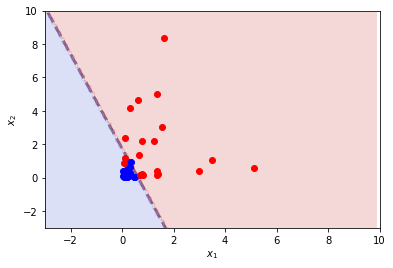

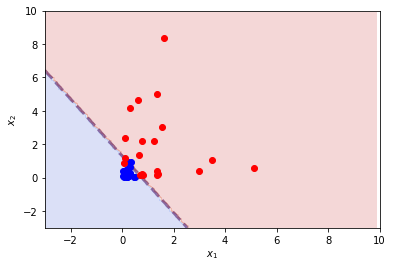

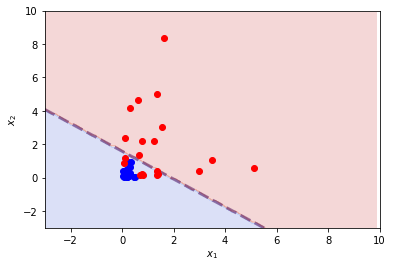

In [78]:
def sequential_minimal_optimization(x, y, C, iterations = 10000, n=40, d=2):
    """optimize the classification with SMO. 
    Enter x_k values in x of shape (n, d), y values of shape (n). C>0 is the regularization."""
    ## task a
    b = 0
    beta = np.zeros(n)
    for k in np.arange(0, n*(n-1)):
        tup = np.random.randint(0, n*(n-1))
        i = tup%n
        j = (int)((tup-i)/n)
        if j>=i:
            j += 1
        one_step(beta, y, x, b, n, i, j, C)
        
    ## task b
    support_vector_number = 0
    med = 0
    f = lambda xk: np.multiply(beta.T, y) @ (x @ xk) + b
    for l in np.arange(0, n):
        if beta[l] > 0:
            med += f(x[l] - y[l])
            support_vector_number += 1
    med /= support_vector_number
    b -= med
    f = lambda xk: np.multiply(beta.T, y) @ (x @ xk.T) + b
    return f, beta
    

x, y = create_test_data()
for C in {0.01, 1, 100}:
    f, beta = sequential_minimal_optimization(x, y, C)
    plt.plot(x[:20,0], x[:20,1], 'bo')
    plt.plot(x[20:,0], x[20:,1], 'ro')
    plot_contour_line(f, 0, x)
    plt.show()

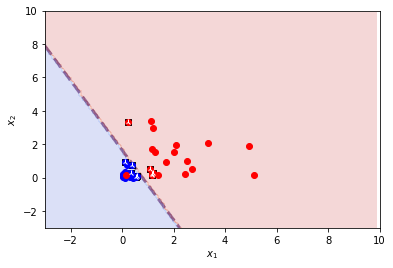

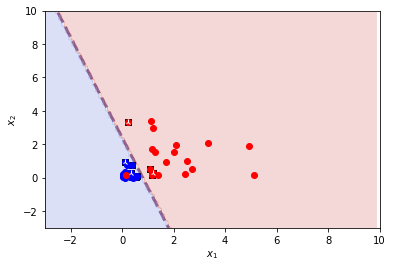

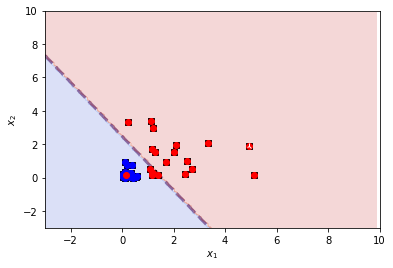

In [88]:
# task c + d
def get_support_and_margin_defining_verctors(x, beta, C, n):
        support_vectors = []
        margin_defining_vectors = []
        for i in np.arange(0, n):
            if beta[i] > 0:
                support_vectors.append(x[i])
                if C > beta [i]:
                    margin_defining_vectors.append(x[i])
        return np.array(support_vectors), np.array(margin_defining_vectors)

x, y = create_test_data()
for C in {0.01, 1, 100}:
    f, beta = sequential_minimal_optimization(x, y, C)
    sup_vec, marg_vec = get_support_and_margin_defining_verctors(x, beta, C, 40)
    plt.plot(sup_vec[:,0], sup_vec[:,1], 'ks')
    plt.plot(x[:20,0], x[:20,1], 'bo')
    plt.plot(x[20:,0], x[20:,1], 'ro')
    plt.plot(marg_vec[:,0], marg_vec[:,1], 'w2')
    plot_contour_line(f, 0, x)
    plt.show()